Data reading

In [1]:
import pandas as pd
file_path="/content/Crop_recommendation.csv"
df=pd.read_csv(file_path)
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


Dataset evaluation

In [2]:
print(df.shape)

(2200, 8)


In [3]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [10]:
print(set(df['label']))

{'muskmelon', 'banana', 'blackgram', 'pigeonpeas', 'lentil', 'papaya', 'orange', 'coconut', 'apple', 'maize', 'grapes', 'pomegranate', 'rice', 'kidneybeans', 'cotton', 'mungbean', 'mango', 'mothbeans', 'jute', 'watermelon', 'chickpea', 'coffee'}


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20


In [12]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall        label  
count  2200.000000  2200.000000  2200.000000  
mean      6.469480   103.463655    10.500000  
std       0.773938    54.958389     6.345731  
min       3.504752    20.211267     0.000000  
25%       5.971693    64.551686     5.000000  
50%       6.425045    94.867624    10.500000  
75% 

Taking target variable and features

In [13]:
X = df.drop(['label'], axis=1)
y=df['label']

In [14]:
print("\nClass distribution of the target variable:")
print(y.value_counts())


Class distribution of the target variable:
label
20    100
11    100
3     100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
5     100
Name: count, dtype: int64


Data Visualization

boxplot

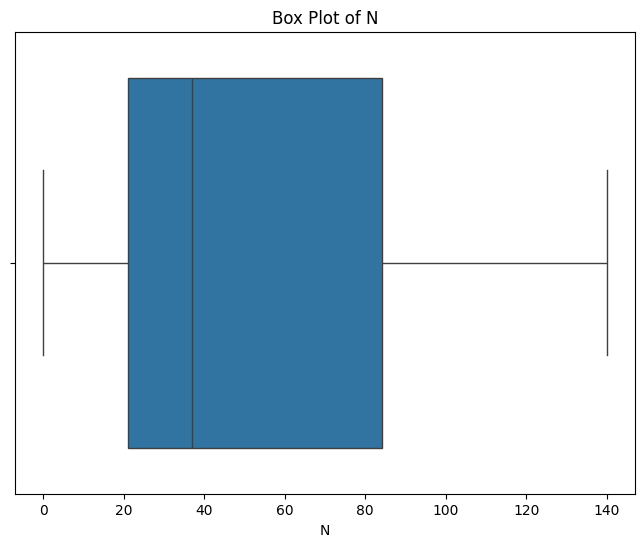

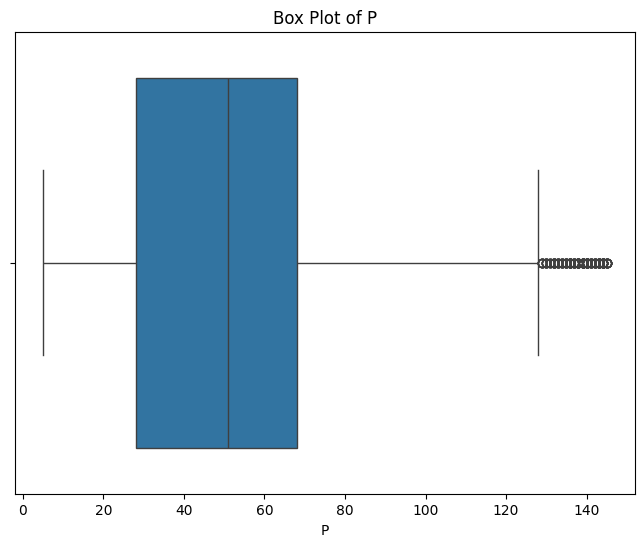

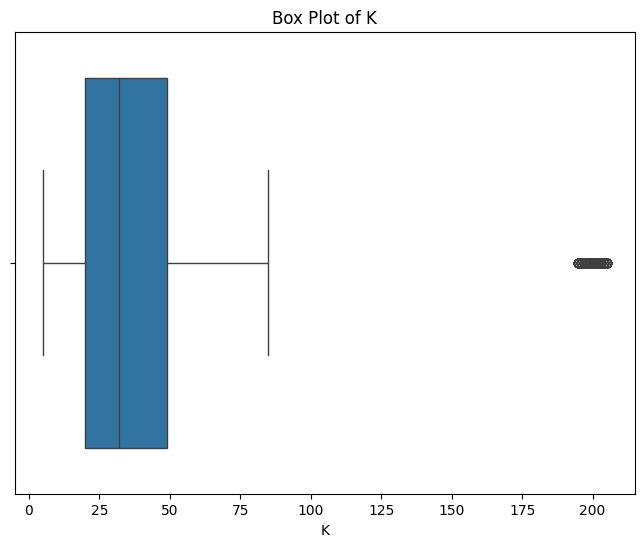

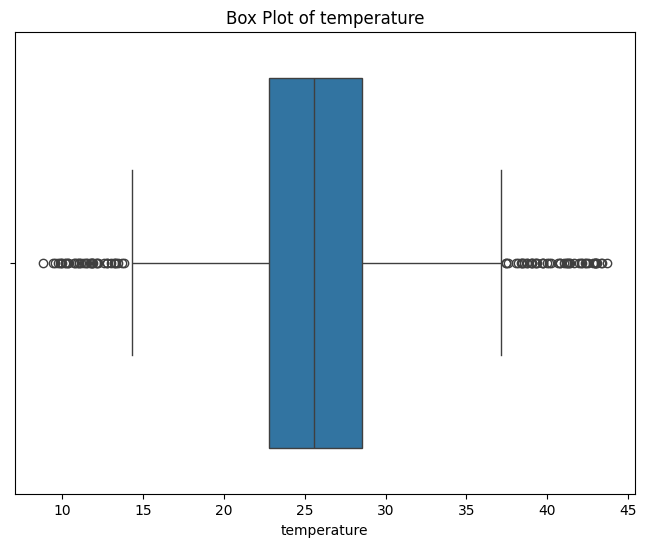

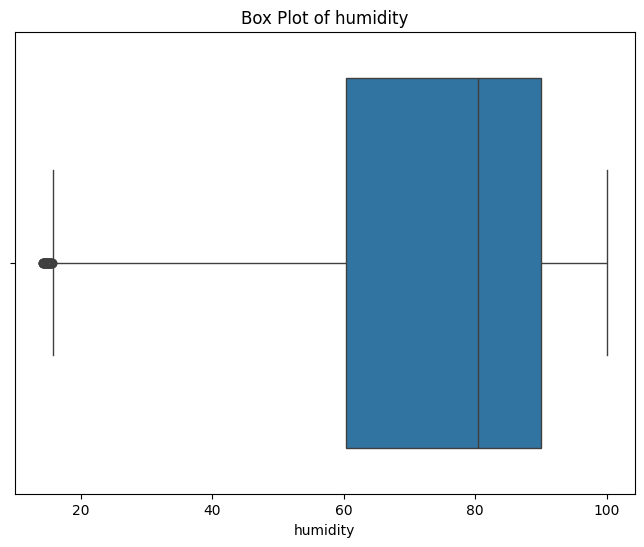

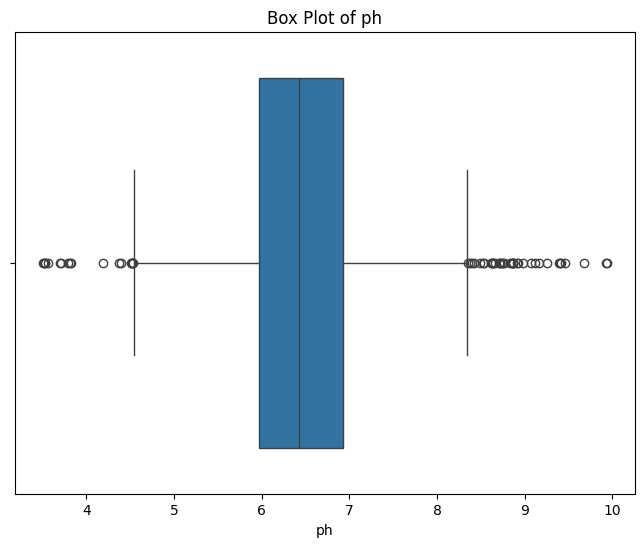

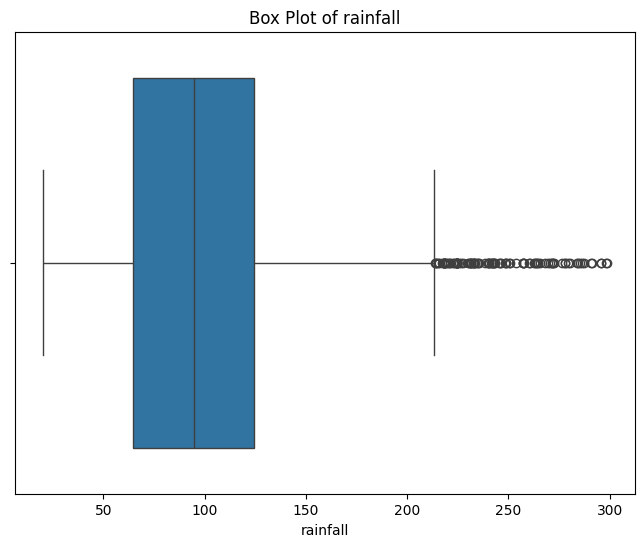

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

feature importance

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)
print("\nFeature Importances:")
sorted_feature_importances


Feature Importances:


,0
rainfall,0.225676
humidity,0.215976
K,0.177675
P,0.152107
N,0.101705
temperature,0.073685
ph,0.053175


Removing outliers

In [18]:
import numpy as np

X = pd.DataFrame(X)

original_index = X.index
outlier_indices = set()

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outlier_indices.update(outliers.index)
y = pd.Series(y, index=original_index)

safe_indices = [idx for idx in outlier_indices if y[idx] != 1]

X_cleaned = X.drop(index=safe_indices)
y_cleaned = y.drop(index=safe_indices)

print("New dataset shape after outlier removal:", X_cleaned.shape, y_cleaned.shape)
print("Class distribution after outlier removal:\n", y_cleaned.value_counts())

New dataset shape after outlier removal: (1768, 7) (1768,)
Class distribution after outlier removal:
 label
11    100
9     100
14    100
18    100
5     100
6     100
2     100
10    100
1     100
19    100
15    100
21    100
8     100
12     98
4      85
16     83
13     58
3      58
17     54
20     32
Name: count, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)
# Check class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({20: 100, 11: 100, 3: 100, 9: 100, 18: 100, 13: 100, 14: 100, 2: 100, 10: 100, 19: 100, 1: 100, 12: 100, 21: 100, 15: 100, 16: 100, 17: 100, 4: 100, 6: 100, 8: 100, 5: 100})


Pre Processing

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print(X_train.shape,y_train.shape)

(1600, 7) (1600,)


SVM model

In [22]:
#svm
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using SVM:", accuracy)

Accuracy using SVM: 0.955


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.96      0.96      0.96        24
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        22
           5       0.96      1.00      0.98        23
           6       0.90      1.00      0.95        26
           8       0.88      0.62      0.73        24
           9       1.00      1.00      1.00        22
          10       0.82      1.00      0.90        14
          11       1.00      0.87      0.93        23
          12       1.00      1.00      1.00        15
          13       1.00      0.88      0.94        17
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        21
          18       1.00      0.96      0.98        25
          19       1.00    

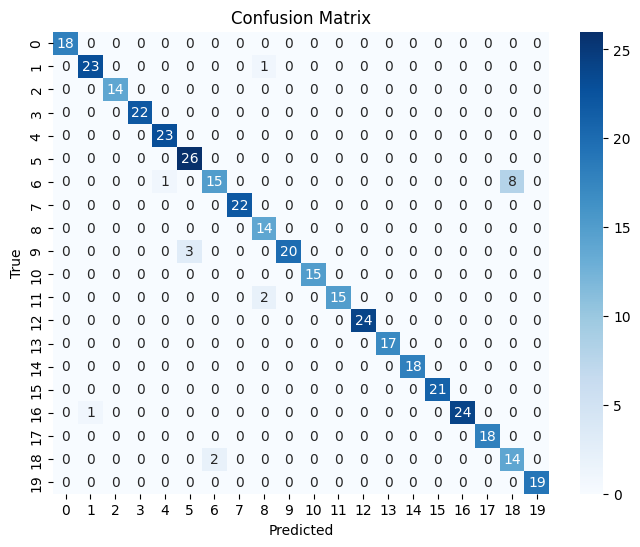

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Random Forest

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy using Random Forest:", accuracy_rf)


Accuracy using Random Forest: 0.9925


In [26]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        26
           8       1.00      0.92      0.96        24
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        14
          11       0.96      1.00      0.98        23
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        21
          18       1.00      1.00      1.00        25
          19       1.00    

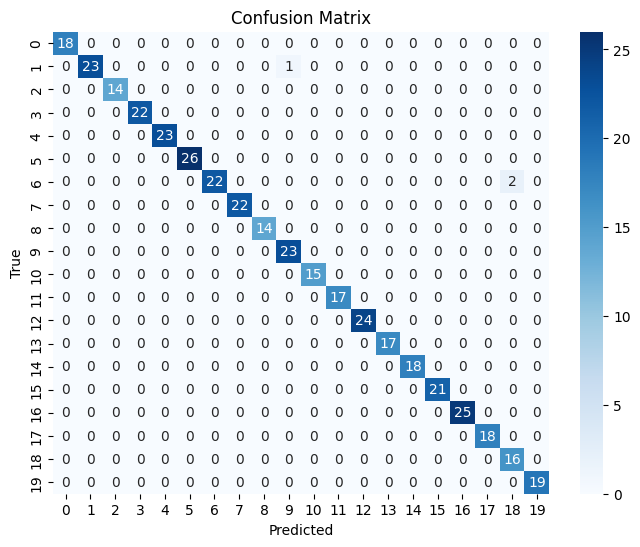

In [27]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Cross-validation

In [30]:

from sklearn.model_selection import cross_val_score

# for SVM model
svm_cv_scores = cross_val_score(svm_model, X_resampled, y_resampled, cv=5) # Using 5 folds
print("\nSVM Cross-validation scores:", svm_cv_scores)
print("SVM Average cross-validation score:", svm_cv_scores.mean())

#for Random Forest model
rf_cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5) # Using 5 folds
print("\nRandom Forest Cross-validation scores:", rf_cv_scores)
print("Random Forest Average cross-validation score:", rf_cv_scores.mean())


SVM Cross-validation scores: [0.9625 0.9725 0.9725 0.9825 0.975 ]
SVM Average cross-validation score: 0.9730000000000001

Random Forest Cross-validation scores: [0.9975 0.99   0.995  0.9975 0.99  ]
Random Forest Average cross-validation score: 0.994


In [31]:
import pickle
filename = 'model.pkl'
pickle.dump(rf_classifier, open(filename, 'wb'))